# Import packages
run the following cell to import necessary packages to run the analysis

In [ ]:
import os
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt
from ome_zarr.io import parse_url
from ome_zarr.reader import Reader, Node
from ome_zarr.utils import info

# Reading data

In [2]:
data_path = Path('/mnt/Data/nuno_martins/Image_data/ExM_processed_data/ZS_HDD5/Data/NPM/Ex011_Re01/20250402/processed_data/')
filelist = os.listdir(data_path)
print(len(filelist))
filelist = [x for x in filelist if x.find('.zar')>0]
filelist.sort()
filelist

3


['NPM_Ex011_Re01_gel_a1_20250402_Im-03_AcquisitionBlock1-Airyscan Processing-02_2.zarr',
 'NPM_Ex011_Re01_gel_a1_20250402_Im-03_AcquisitionBlock2-Airyscan Processing-03_2.zarr',
 'NPM_Ex011_Re01_gel_a1_20250402_Im-03_AcquisitionBlock3-Airyscan Processing-04_2.zarr']

In [99]:
file_index = 2
file_path = str(data_path)+'/'+filelist[file_index]
filename = filelist[file_index][:filelist[file_index].index('.zarr')]
print(file_path)
print(filename)

/mnt/Data/nuno_martins/Image_data/ExM_processed_data/ZS_HDD5/Data/NPM/Ex011_Re01/20250402/processed_data/NPM_Ex011_Re01_gel_a1_20250402_Im-03_AcquisitionBlock3-Airyscan Processing-04_2.zarr
NPM_Ex011_Re01_gel_a1_20250402_Im-03_AcquisitionBlock3-Airyscan Processing-04_2


In [100]:
zarr_file = parse_url(file_path, mode='r')

reader = Reader(zarr_file)
nodes = list(reader())
print(len(nodes))

1


## Getting file info

In [101]:
zarr_info = info(file_path)
img_info = list(zarr_info)[0].data

# for item in img_info:
#     print(item.shape)

/media/npmartins/ZS_HDD5/Data/NPM/Ex011_Re01/20250402/processed_data/NPM_Ex011_Re01_gel_a1_20250402_Im-03_AcquisitionBlock3-Airyscan Processing-04_2.zarr [zgroup]
 - metadata
   - Multiscales
   - OMERO
 - data
   - (1, 3, 1032, 7558, 4615)
   - (1, 3, 516, 3779, 2307)
   - (1, 3, 258, 1889, 1153)
   - (1, 3, 129, 944, 576)
   - (1, 3, 64, 472, 288)
   - (1, 3, 32, 236, 144)
   - (1, 3, 16, 118, 72)
   - (1, 3, 16, 59, 36)
   - (1, 3, 16, 29, 18)
   - (1, 3, 16, 14, 18)


In [102]:
resolution_level = 3


In [103]:
image_node = nodes[0]

dask_data = image_node.data
# print(len(dask_data))

image_array = dask_data[resolution_level]
print(image_array.shape)

(1, 3, 129, 944, 576)


In [104]:
# image = image_array[0, 0, image_array.shape[2]//2, :, :]

image = np.zeros((image_array.shape[1], image_array.shape[-2], image_array.shape[-1]), dtype=image_array.dtype)
for chan in range(image_array.shape[1]):
    image[chan] = image_array[0, chan, image_array.shape[2]//2, :, :]

print(image.shape)

(3, 944, 576)


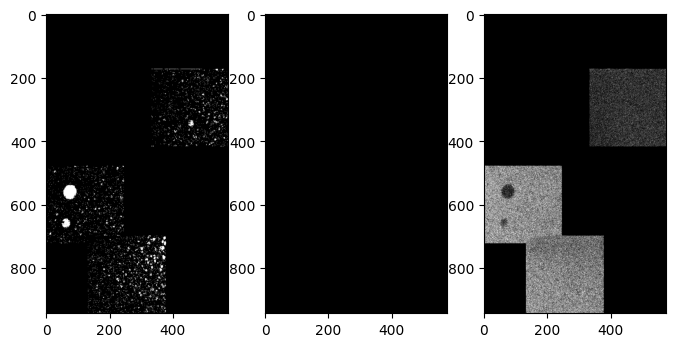

In [105]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.imshow(
    image[0], 
    cmap='gray',
    vmin=np.percentile(image[0], 1), 
    vmax=np.percentile(image[0], 99),
)

plt.subplot(1,3,2)
plt.imshow(
    image[1], 
    cmap='gray',
    vmin=np.percentile(image[1], 1), 
    vmax=np.percentile(image[1], 99),
)
plt.subplot(1,3,3)
plt.imshow(
    image[2], 
    cmap='gray',
    vmin=np.percentile(image[2], 1), 
    vmax=np.percentile(image[2], 99),
)
plt.show()